In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
#import numba

t0 = time.time()
tmid1 = t0
particles = 1
part_tot = 20000
size = 1001 #size of the grid, must be odd for a center
x0 = int((size - 1) / 2)
e_radius = 15 #edge radius
d_radius = 35 # death radius
tree = np.zeros([size, size]) # n X n array means array center is [(n-1)/2,(n-1)/2] when n is odd
tree[x0, x0] = 1
spawn_overlap = 0

def Spawn():
    rand1 = random.randrange(36000) / 100
    angle = rand1 * np.pi / 180
    if 90 > rand1 >= 0:
        x = -e_radius * np.cos(angle) - x0
        y = e_radius * np.sin(angle) - x0
    if 180 > rand1 >= 90:
        x = e_radius * np.cos(angle) - x0
        y = -e_radius * np.sin(angle) - x0
    if 270 > rand1 >= 180:
        x = -e_radius * np.cos(angle) - x0
        y = e_radius * np.sin(angle) - x0
    if 360 > rand1 >= 270:
        x = e_radius * np.cos(angle) - x0
        y = -e_radius * np.sin(angle) - x0
    return round(x), round(y)


i=0

""" NEW MOVE ?
def Move()
    randx = random.randrange(-1,2)
    randy = random.randrange(-1,2)
    #tree[x,y] = 0
    x += randx
    y += randy
    #tree[x,y] = 1
"""
spawn = 0
while particles < part_tot:
    x, y = Spawn()
    spawn += 1
    if tree[x, y] != 1:
    #if tree[x, y] == 1:
        #spawn_overlap += 1
        #print("*** SPAWN OVERLAP ***")
        #if spawn_overlap > 5000:
            #break
    #else:
        while i < 1:
            if np.sqrt((x + x0)*(x + x0) + (y + x0)*(y + x0)) > d_radius: # Checking if particle is in death zone
                #tree[x,y] = 0
                break
            elif (tree[x + 1, y] + tree[x - 1, y] + tree[x, y + 1] + tree[x, y - 1] + tree[x + 1, y + 1]  #Long statement checking if particle is near aggregate
                   + tree[x + 1, y - 1] + tree[x - 1, y + 1] + tree[x - 1, y - 1] > 0):
                tree[x, y] = 1
                particles += 1
                if (particles / 1000) == int(particles / 1000):
                    tmid2 = time.time()
                    print("N =", particles, "| Time since last checkpoint:", round(tmid2 - tmid1, 2), "| Time since start:", round(tmid2 - t0, 2))
                    tmid1 = tmid2
                if d_radius > np.sqrt((x + x0)*(x + x0) + (y + x0)*(y + x0)) > e_radius and d_radius < x0:
                    e_radius += 1
                    d_radius += 1
                    if d_radius == x0 - 1:
                        print("*** DEATH RADIUS MAXXED ***")
                    #print("*** DEATH RADIUS INCREASED TO", d_radius, "***")
                break
            else:
                randx = random.randrange(-1,2)
                randy = random.randrange(-1,2)
                x += randx
                y += randy
                
                """OLD MOVE
                rand2 = random.randrange(4)
                if rand2 == 0:
                    tree[x, y] = 0
                    x += 1
                    tree[x, y] = 1
                    #print("down")
                elif rand2 == 1:
                    tree[x, y] = 0
                    x -= 1
                    tree[x, y] = 1
                    #print("up")
                elif rand2 == 2:
                    tree[x, y] = 0
                    y += 1
                    tree[x, y] = 1
                    #print("right")
                elif rand2 == 3:
                    tree[x, y] = 0
                    y -= 1
                    tree[x, y] = 1
                    #print("left")
                """
t1 = time.time()
hours = int((t1 - t0) / 3600)
minutes = int(((t1 - t0) / 3600 - hours) * 60)
seconds = int(((((t1 - t0) / 3600 - hours) * 60) - minutes) * 60)
print("*** TIME ELAPSED :", hours, "HOURS,", minutes, "MINUTES, AND", seconds, "SECONDS ***")
print("*** TOTAL PARTICLES =", particles, " ***")
plt.matshow(tree)

N = 1000 | Time since last checkpoint: 1.39 | Time since start: 1.39
N = 2000 | Time since last checkpoint: 3.41 | Time since start: 4.8
N = 3000 | Time since last checkpoint: 5.81 | Time since start: 10.61
N = 4000 | Time since last checkpoint: 10.1 | Time since start: 20.71
N = 5000 | Time since last checkpoint: 13.64 | Time since start: 34.36
N = 6000 | Time since last checkpoint: 19.46 | Time since start: 53.81
N = 7000 | Time since last checkpoint: 19.23 | Time since start: 73.05
N = 8000 | Time since last checkpoint: 22.1 | Time since start: 95.15
N = 9000 | Time since last checkpoint: 24.86 | Time since start: 120.01
N = 10000 | Time since last checkpoint: 26.35 | Time since start: 146.36


KeyboardInterrupt: 

10957
1.65287136651338


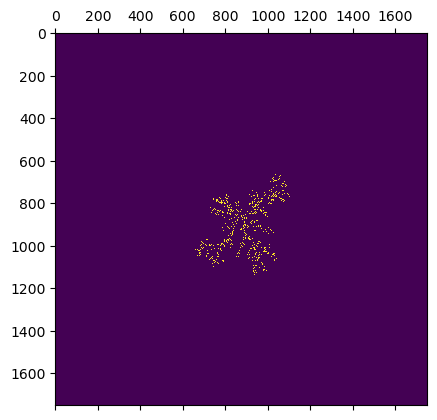

In [24]:
print(particles)
plt.matshow(tree)
print(np.log(particles) / np.log(e_radius))
#plt.matshow(tree[225:535, 0:535])

In [25]:
print(spawn)
#print(spawn_overlap)

30525
